<a href="https://colab.research.google.com/github/aniray2908/ML-foundations-rebuild/blob/main/statistical_learning/01_bias_variance_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bias–Variance Tradeoff Demonstration

In this notebook, we will:

- Generate nonlinear synthetic data
- Fit polynomial regression models of increasing complexity
- Compare training vs test error
- Visualize underfitting and overfitting

Goal:
Make the bias–variance tradeoff visually concrete.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Step 1: Generate Synthetic Nonlinear Data

We simulate data from:

    y = sin(x) + noise

This ensures:
- The true relationship is nonlinear.
- A linear model will underfit.
- High-degree polynomials may overfit.


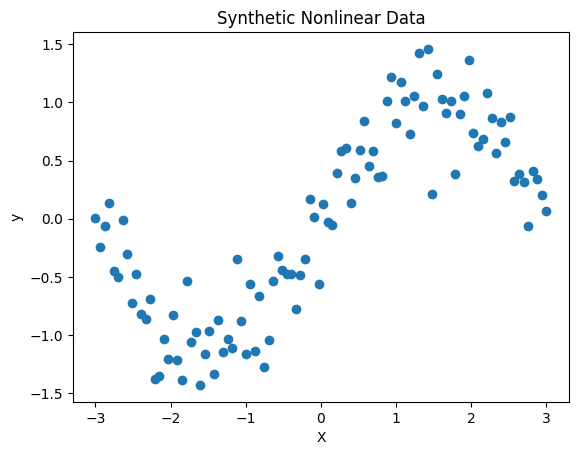

In [2]:
np.random.seed(42)

X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.3, size=X.shape)

plt.figure()
plt.scatter(X, y)
plt.title("Synthetic Nonlinear Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Step 2: Split Into Training and Test Sets

We separate data into:

- Training set (used for fitting)
- Test set (used for evaluating generalization)

This simulates unseen data.


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## Step 3: Fit Polynomial Models of Increasing Degree

We will test polynomial degrees:

- Degree 1 (Linear)
- Degree 3 (Moderate complexity)
- Degree 5 (Flexible)
- Degree 15 (Highly flexible)

Expectation:

As degree increases:
- Bias decreases
- Variance increases


In [4]:
degrees = [1, 3, 5, 15]

train_errors = []
test_errors = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)

    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

## Step 4: Visualize Training vs Test Error

We expect:

- Training error to decrease steadily.
- Test error to decrease initially, then increase.

This is the bias–variance curve.


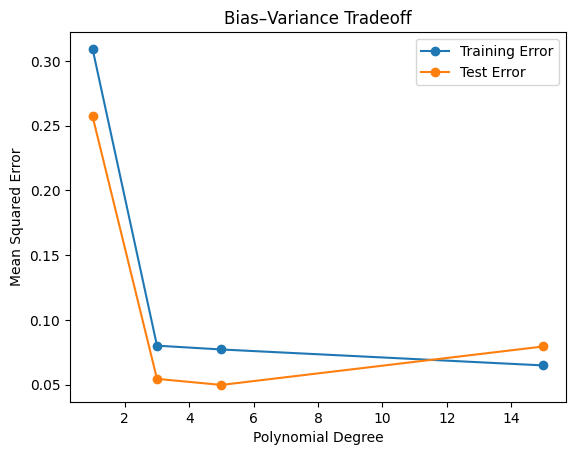

In [5]:
plt.figure()
plt.plot(degrees, train_errors, marker='o', label="Training Error")
plt.plot(degrees, test_errors, marker='o', label="Test Error")

plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias–Variance Tradeoff")
plt.legend()
plt.show()

## Step 5: Visualize Underfitting and Overfitting

We now visualize fitted curves for:

- Degree 1 (Underfitting)
- Degree 15 (Overfitting)

This makes bias and variance visible.


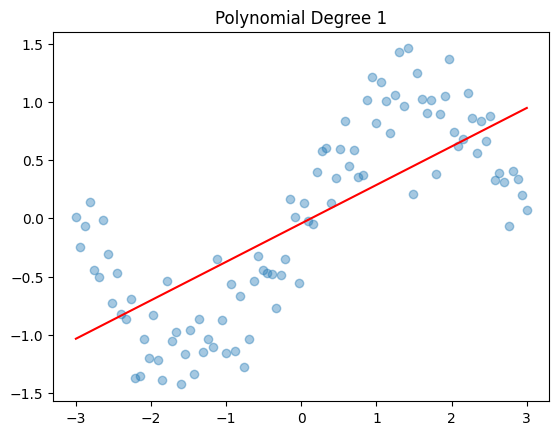

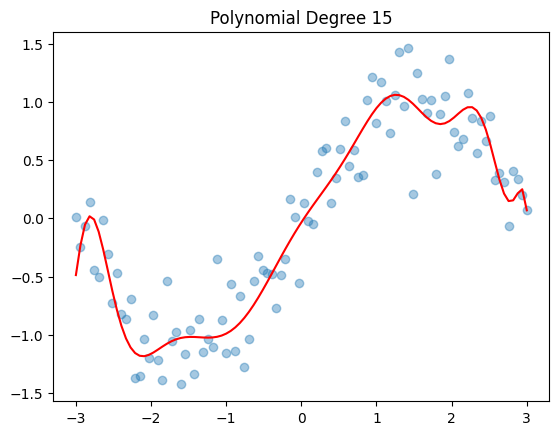

In [6]:
def plot_model(degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(poly.fit_transform(X_train), y_train)

    y_pred = model.predict(X_poly)

    plt.figure()
    plt.scatter(X, y, alpha=0.4)
    plt.plot(X, y_pred, color='red')
    plt.title(f"Polynomial Degree {degree}")
    plt.show()

plot_model(1)
plot_model(15)

## Observations

Degree 1:
- High bias
- Underfits nonlinear pattern

Degree 15:
- Very low training error
- Highly wiggly curve
- Overfits noise

Key Insight:
Increasing model complexity reduces bias but increases variance.
